In [48]:
import kagglehub
from tqdm import tqdm

In [49]:
path = kagglehub.dataset_download("justanotherjason/flashpoint-ukraine-dataset", path="fud.gpkg")


In [50]:
path

'/Users/jason/.cache/kagglehub/datasets/justanotherjason/flashpoint-ukraine-dataset/versions/1/fud.gpkg'

In [51]:
import geopandas as gpd

In [52]:
gdf = gpd.read_file(path)

In [53]:
gdf

,f_lat,f_lng,f_bright,f_scan,f_track,date,f_acqtime,f_sat,f_inst,f_conf,...,a_type,a_event,a_subevent,a_location,a_lat,a_lng,a_geoprec,h_adm_en,h_adm_ua,geometry
0,48.06239,37.60643,332.07,0.66,0.73,2024-07-28,1130,N21,VIIRS,n,...,Political violence,Explosions/Remote violence,Air/drone strike,Vodyane,48.0960,37.6666,2.0,Ocheretynska,Очеретинська,"MULTIPOLYGON (((37.81759 48.36787, 37.81779 48..."
1,47.51498,35.83017,306.70,0.41,0.37,2024-07-09,2350,N20,VIIRS,n,...,Political violence,Explosions/Remote violence,Air/drone strike,Novodanylivka,47.5242,35.8235,1.0,Novodanylivka,Новоданилівка,"MULTIPOLYGON (((35.81086 47.54522, 35.81271 47..."
2,51.60208,34.06103,297.22,0.47,0.40,2024-09-16,0013,N20,VIIRS,n,...,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Vovkivka,51.5200,34.2598,1.0,Shalyhynska,Шалигинська,"MULTIPOLYGON (((34.29189 51.48489, 34.28394 51..."
3,48.38680,37.84781,330.63,0.42,0.37,2024-08-15,1002,N20,VIIRS,l,...,Political violence,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48...."
4,49.77481,37.71021,345.49,0.43,0.38,2023-09-22,1028,N,VIIRS,n,...,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Kucherivka,49.7182,37.6713,2.0,Petropavlivska,Петропавлівська,"MULTIPOLYGON (((37.9515 49.73075, 37.95159 49...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135045,47.87373,33.41956,298.59,0.39,0.37,2021-09-12,2357,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None
135046,47.15536,37.56606,350.99,0.38,0.43,2020-09-12,1045,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None
135047,47.23802,31.74757,353.27,0.40,0.60,2020-09-20,1136,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None
135048,47.15641,37.53461,304.65,0.51,0.41,2021-03-04,2356,N,VIIRS,n,...,None,None,None,None,NaN,NaN,NaN,None,None,None


In [54]:
gdf.geometry

0         MULTIPOLYGON (((37.81759 48.36787, 37.81779 48...
1         MULTIPOLYGON (((35.81086 47.54522, 35.81271 47...
2         MULTIPOLYGON (((34.29189 51.48489, 34.28394 51...
3         MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....
4         MULTIPOLYGON (((37.9515 49.73075, 37.95159 49....
                                ...                        
135045                                                 None
135046                                                 None
135047                                                 None
135048                                                 None
135049                                                 None
Name: geometry, Length: 135050, dtype: geometry

In [55]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## EDA

A significant amount of probing, cleaning sorting and joining was done to build the dataset. Don't repeat that analysis, just review the EDA notebook for the Ukraine dataset. What remains to understand here that's relevant to prediction? 

- confirm geographic distribution of events 
- review balance of classes and subclasses (event types)
- clarify what is an input to prediction and what ends up being a label
- look at time series distribution 
- understand what supplemental datasets are essentialy to prediction - elevation data e.g. 
- figure out how to split data ... temporally seems insufficient... like with weather events, the goal is to preduct how a series of events concludes, or how the priors influence the posterior. If I isolate events temporally, the predictions end up IN the test/train data. 


In [56]:
gdf['location'] = gpd.points_from_xy(y=gdf.f_lat, x=gdf.f_lng)
gdf.set_geometry('location', inplace=True)

In [59]:
toretsk = gdf[gdf.a_location == 'Toretsk']
toretsk

,f_lat,f_lng,f_bright,f_scan,f_track,date,f_acqtime,f_sat,f_inst,f_conf,...,a_event,a_subevent,a_location,a_lat,a_lng,a_geoprec,h_adm_en,h_adm_ua,geometry,location
3,48.38680,37.84781,330.63,0.42,0.37,2024-08-15,1002,N20,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.84781 48.3868)
88,48.39430,37.86705,301.20,0.51,0.49,2024-09-22,2254,N21,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.86705 48.3943)
92,48.40821,37.81406,343.01,0.48,0.48,2024-07-06,1051,N20,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.81406 48.40821)
258,48.41077,37.86689,331.18,0.38,0.36,2024-08-25,1013,N20,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.86689 48.41077)
274,48.39269,37.85576,296.36,0.42,0.61,2024-09-07,2233,N21,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.85576 48.39269)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67285,48.39804,37.86902,332.19,0.53,0.42,2024-09-22,1041,N21,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.86902 48.39804)
67302,48.37680,37.85487,330.26,0.50,0.65,2024-08-18,0905,N20,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.85487 48.3768)
67344,48.39898,37.82941,298.82,0.42,0.61,2024-09-15,2233,N20,VIIRS,n,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.82941 48.39898)
67387,48.37939,37.83700,330.14,0.39,0.36,2024-09-23,1019,N21,VIIRS,l,...,Battles,Armed clash,Toretsk,48.3934,37.8453,2.0,Toretsk,Торецьк,"MULTIPOLYGON (((37.86815 48.4105, 37.86829 48....",POINT (37.837 48.37939)


In [61]:
# TODO first for jupyter, second for vscode
#%matplotlib widget
%matplotlib inline

In [62]:
import matplotlib.pyplot as plt 
import numpy as np

<Axes: >

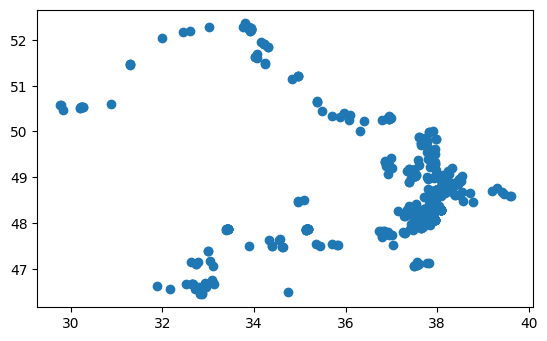

In [63]:
gdf.head(500).plot()

In [64]:
def temporal_scatter(gdf, n_dates=10):
    """
    Create a scatter plot of x,ys (presumed to be the active geometry in the supplied DF)
    using a date column. 

    NOTE: Geopandas and matplotlib maneuvering with help from gpt-4o: 
    https://chatgpt.com/share/688cddab-ae9c-8013-ac1a-6b9211e72971
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    dates = sorted(gdf['date'].unique())
    for i, date in enumerate(dates):
        if i >= n_dates:
            break 

        slice_df = gdf[gdf['date'] == date]
        xs = slice_df.geometry.x
        ys = slice_df.geometry.y
        zs = np.full_like(xs, i)
        ax.scatter(xs, ys, zs, label=f'Date {date}', depthshade=True)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()


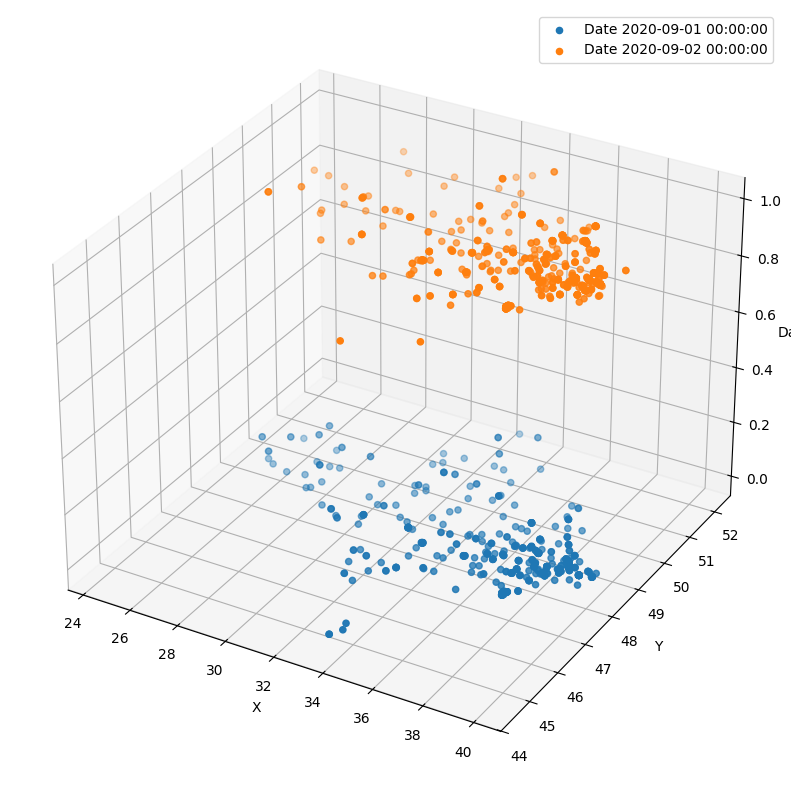

In [65]:
temporal_scatter(gdf, n_dates=2)

In [66]:
#TODO: better name for the admin boundary than 'geometry' ... confusing
gdf.set_geometry('geometry', inplace=True)

In [67]:
import plotly.graph_objects as go

In [68]:
type(gdf.iloc[0].geometry)

shapely.geometry.multipolygon.MultiPolygon

In [69]:
def plot_temporal_polygons(gdf): 
    fig = go.Figure()

    for t in range(1):
        poly = gdf.iloc[t].geometry
        x, y = poly.exterior.xy
        z = [t] * len(x)
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            line=dict(width=4),
            name=f"Time {t}"
        ))

    fig.update_layout(scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Time'
    ))
    fig.show()

<Axes: >

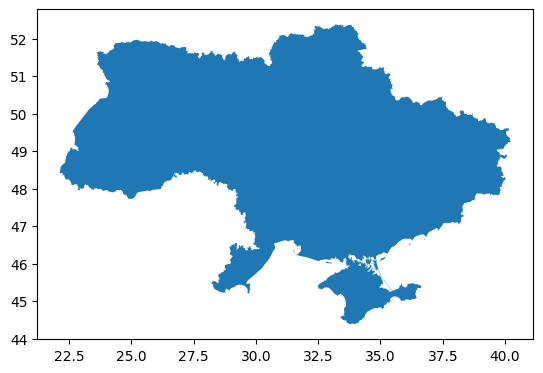

In [70]:
ukraine_admin_gdb = "../data/ukr_admbnd_sspe_20240416_AB_GDB.gdb"    
# ukraine_level_4_lyr = 3
# ukraine_level_3_lyr = 4
# ukraine_level_2_lyr = 5
# ukraine_level_1_lyr = 6
# ukraine_level_0_lyr = 7
admin = gpd.read_file(ukraine_admin_gdb, layer=7)
admin.plot()

In [71]:
admin.iloc[0]

ADM0_EN                                                   Ukraine
ADM0_UA                                                   Україна
ADM0_RU                                                   Украина
ADM0_PCODE                                                     UA
date                                    2024-03-18 00:00:00+00:00
validOn                                 2024-04-16 00:00:00+00:00
validTo                                                       NaT
AREA_SQKM                                           600217.274417
Shape_Length                                           112.065036
Shape_Area                                              73.804151
geometry        MULTIPOLYGON (((30.206624202000057 45.25740417...
Name: 0, dtype: object

In [100]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [124]:
def make_box(x=30.0, y=47.0, z=0, w=2, h=4):
    """
    Create a box to illustrate our spatiotemporal cross-validation (STCV) strategy 

    NOTE: setup of box geometry suitable for matplotlib courtesy of gpt-4o, part of the 
    larger conversation on rendering spatial data with matplotlib et al: 
    https://chatgpt.com/share/688cddab-ae9c-8013-ac1a-6b9211e72971
    """ 

    # Make boundaries 
    x0, x1 = x, x+w
    y0, y1 = y, y+w
    z0, z1 = z, z+h

    # Build the corners 
    corners = [
        [x0, y0, z0],
        [x1, y0, z0],
        [x1, y1, z0],
        [x0, y1, z0],
        [x0, y0, z1],
        [x1, y0, z1],
        [x1, y1, z1],
        [x0, y1, z1],
    ]

    # Make assoc'd faces 
    faces = [
        [corners[0], corners[1], corners[2], corners[3]],  # bottom
        [corners[4], corners[5], corners[6], corners[7]],  # top
        [corners[0], corners[1], corners[5], corners[4]],  # front
        [corners[2], corners[3], corners[7], corners[6]],  # back
        [corners[1], corners[2], corners[6], corners[5]],  # right
        [corners[0], corners[3], corners[7], corners[4]],  # left
    ]

    return faces 

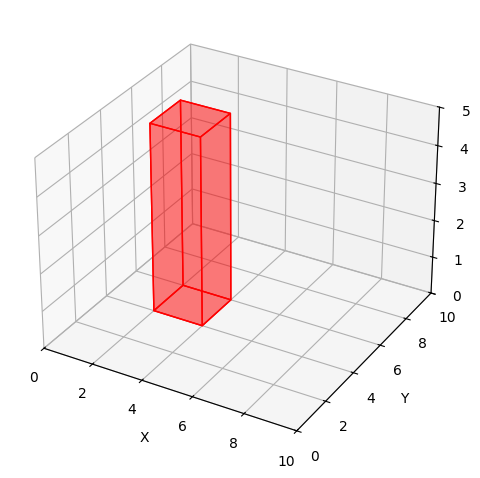

In [129]:
faces = make_box(2,4,0,2,5)
block_color = (1, 0, 0, 0.3)  # semi-transparent red

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

box = Poly3DCollection(faces, facecolors=(1, 0, 0, 0.3), edgecolors='r')
ax.add_collection3d(box)

# Set axis limits and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()

In [120]:
def set_axes_range(ax): 
    """
    We need to adjust the axes range to keep things proportional, matplotlib doesn't do this by 
    default. 
    NOTE: This hack courtesy of gpt-4o. See link in make_box()
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    ax.set_xlim(x_limits[0], x_limits[1])
    ax.set_ylim(y_limits[0], y_limits[1])
    ax.set_zlim(z_limits[0], z_limits[1])

In [ ]:
def temporal_scatter_w_poly(gdf, geom, n_dates=3, color_map='OrRd', box=None, edge='r'): 
    """
    Plot x/y coordinates for date groupings with reference geometry for the 
    first n dates (oldest to newest). Presumes we have a 'date' column in the 
    supplied df. Also accepts a set of faces to plot in the box param, constructed
    ideally w/ make_box(). 
    """

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    dates = sorted(gdf['date'].unique())
    
    cmap = cm.get_cmap(color_map, n_dates)
    norm = mcolors.Normalize(vmin=0, vmax=n_dates)
    ix_to_color = {t: cmap(norm(t)) for t in range(n_dates)}
    
    for i, date in enumerate(dates):    
        if i >= n_dates:
            break 
        
        color = ix_to_color[i]
    
        # Plot polygons associated with whatever geometry we've been given    
        polys = list(geom.geoms)
    
        for poly in polys:
            x, y = poly.exterior.xy
            z = [i] * len(x)
            verts = [list(zip(x, y, z))]
            ax.add_collection3d(Poly3DCollection(verts, alpha=0.5, facecolor=color))
        
        # Slice DF along dates
        date_df = gdf[gdf['date'] == date]
    
        # Plot associated detections     
        xs = date_df.location.x
        ys = date_df.location.y
        zs = np.full_like(xs, i)
        ax.scatter(xs, ys, zs, color=color, label=f'Date {date}', depthshade=True)
    
    # If we've been given a prismbox to render, shim it in there
    if box is not None: 
        block_color = (1, 0, 0, 0.3)  # semi-transparent red, courtesy of gpt-4o
        prism = Poly3DCollection(box, facecolors=block_color, edgecolors=edge)
        ax.add_collection3d(prism)

    # Adjust the extents to ensure scale in the x/y and zoom to the polygon provided... 
    xmin, ymin, xmax, ymax = geom.bounds
    x_span = xmax-xmin
    y_span = ymax-ymin 

    # if x_span > y_span: 
    #     ax.set_xlim(xmin, xmax)
    #     ax.set_ylim(ymin-x_span/2, ymax+x_span/2)
    # elif y_span > x_span: 
    #     ax.set_xlim(xmin-y_span/2, xmax+y_span/2)
    #     ax.set_ylim(ymin, ymax)

    ax.set_box_aspect([1, 1, 1])
    ax.set_xlabel('Lon')
    ax.set_ylabel('Lat')
    ax.set_zlabel('Date')
    plt.legend()
    ax.set_zlim(0, n_dates + 1)
    plt.tight_layout()
    plt.show()

/var/folders/rj/1f5wy6qj5r317rr06jymfqth0000gn/T/ipykernel_10741/1527640166.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map, n_dates)


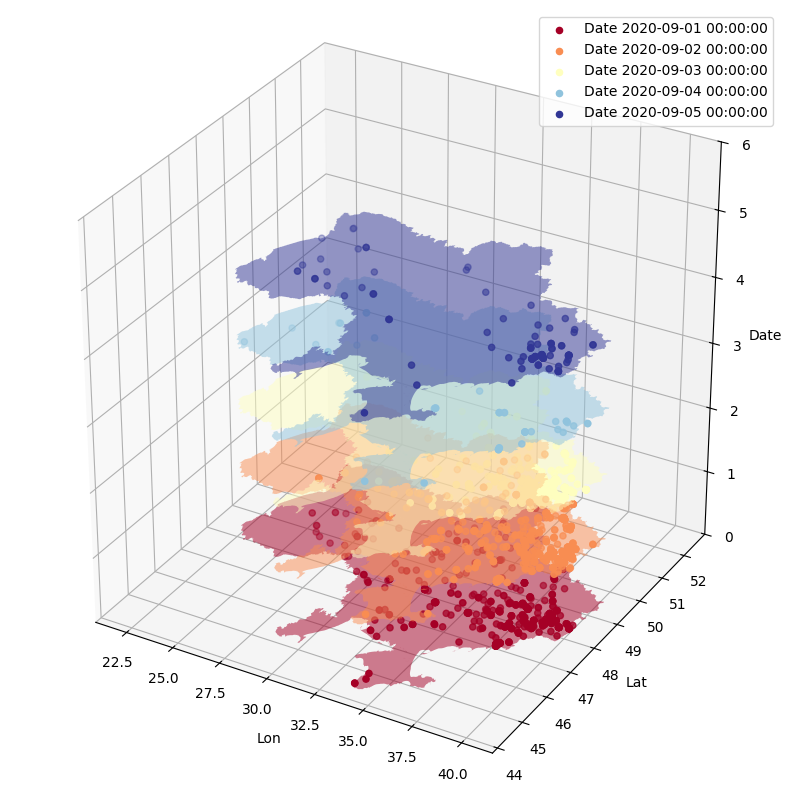

In [150]:
temporal_scatter_w_poly(gdf, admin.iloc[0].geometry, n_dates=5, color_map="RdYlBu")

/var/folders/rj/1f5wy6qj5r317rr06jymfqth0000gn/T/ipykernel_10741/1527640166.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(color_map, n_dates)


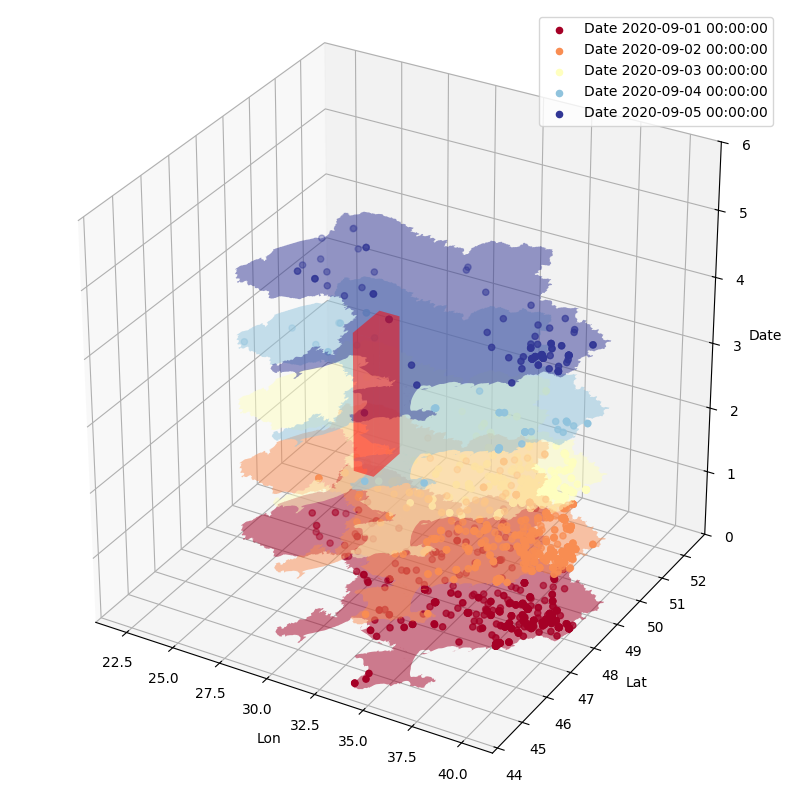

In [151]:
box = make_box(33.0,45.0, 3, 1, 2)
temporal_scatter_w_poly(gdf, admin.iloc[0].geometry, n_dates=5, color_map="RdYlBu", box=box)

<Axes: >

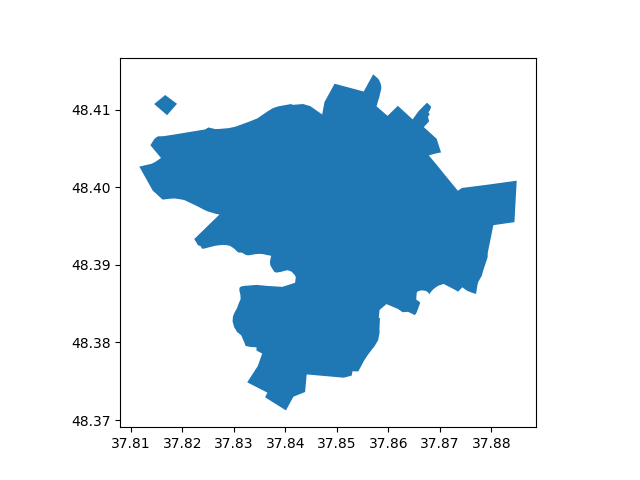

In [ ]:
gdf[gdf.a_location == 'Toretsk'].iloc[0:1].plot()

## Dataset Transformation

Intuition suggests causality here over time at least and so we need our models to have access to the temporal dimension ... furnish that and implicitly address computational complexity by transforming the dataset into a 4d tensor that captures spatial dimension (x,y), temporal dimension (day/date) and k-features of the thermal anomaly. 

Input: 
- Geopandas dataframe with 120K+ events 

Output: 
- 4d numpy array of x,y,date,features

Configuration: 
- we must be able to stipulate: 
  - the length of the temporal window 
  - the bounding box of the lat long
  - the spatial grid cell size
- splits are a unique problem here, 
  - spatiotemporal holdout: create silos in time and space that ensure the likelihood of data leakage is lowered dramatically, split into train, val and test sets where each rectangular prism is isolated 
  - include configuration for block size
    - presume square spatial geometry
    - time/depth must be equal to spatial grid size, right? 
    - add spatial and temporal buffers to limit contamination
  - call this spatiotemporal cross validation (STCV)

## Naive modeling 

## Classic/non-deep modeling 

Hawkes process seems like the baseline here ... but perhaps a linear regression model would serve to derisk the HP. I.e. implement linear regression, then if time permits, retreat to an HP model? 

In [ ]:
from sklearn import linear

## Deep learning modeling 